In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI, Data Science & Analytics/50_Startups.csv')

In [ ]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fit_transform for training, and transform for test --> We fit the training data for model building

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the test results

In [ ]:
y_pred = regressor.predict(X_test)

y_pred

array([114984.58442184, 128352.53246731, 117445.50358416, 116852.43092964,
        73686.77398515,  99593.90262075, 130752.8916314 ,  55378.02431896,
        93636.51056263, 125824.14381306])

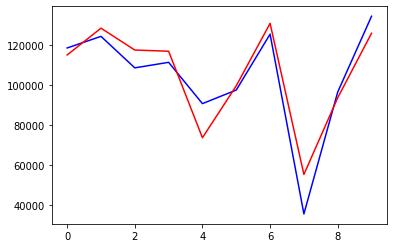

In [ ]:
# plot
plt.plot(y_test, color = 'blue', label='test')   
plt.plot(y_pred, color='red', label='pred')
plt.show()

In [ ]:
X_test

array([[ 1.29099445, -0.73379939, -0.61588176,  0.00543502, -0.31123175,
         0.68446241],
       [-0.77459667,  1.36277029, -0.61588176,  0.32577815, -0.29974436,
         0.65482373],
       [-0.77459667, -0.73379939,  1.62368828,  0.02177024, -0.85437649,
        -0.56672416],
       [-0.77459667, -0.73379939,  1.62368828,  0.0495857 ,  1.17477291,
         0.69295315],
       [-0.77459667,  1.36277029, -0.61588176, -0.97842212,  0.17989033,
        -0.08749065],
       [-0.77459667, -0.73379939,  1.62368828, -0.30709722,  1.13487255,
        -0.98109566],
       [-0.77459667, -0.73379939,  1.62368828,  0.38589688,  0.85096116,
         0.55711827],
       [-0.77459667, -0.73379939,  1.62368828, -1.55979819, -2.62458002,
        -1.679291  ],
       [-0.77459667, -0.73379939,  1.62368828, -0.61973035, -1.3844114 ,
        -0.0527399 ],
       [ 1.29099445, -0.73379939, -0.61588176,  0.33080658,  0.49413241,
         0.32040314]])

In [ ]:
#0.0 0.0 1.0 165349.2 136897.8 471784.1

In [ ]:
#New York
#R&D Spend: 120000
#Administration: 120000
#Marketing Spend: 400000
data = [[0.0, 0.0, 1.0, 120000, 120000, 400000]]

# Create the pandas DataFrame 
new_df = pd.DataFrame(data)

In [ ]:
new_df = sc.transform(new_df)

In [ ]:

single = regressor.predict(new_df)

In [ ]:
single

array([155298.86376745])

In [ ]:
Fraud/Not Fraund --> LabelEncoding --> 1/0
Regression --> Y variable already should be numeric

X --> Feature Scaling